In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Getting Started with Image

## Load image

In [2]:
img = cv2.imread('beautiful_girl.jpg', 1) #1: color mode, 0: grayscale mode
h, w, *a = img.shape
scale = 3 #scale factor
img = cv2.resize(img, (w//scale, h//scale)) #Resize image to a smaller size for showing

## Display an image and save an image with cv2

In [3]:
cv2.imshow('pretty_girl', img) #A window will pop-up to display image
k = cv2.waitKey(0) & 0xFF #ESC key for 64-bit machine
if k==27:
    cv2.destroyAllWindows() #Press ESC to close the window
elif k==ord('s'):
    cv2.imwrite('girl_in_gray.jpg', img) #Press 's' to save the image and then close the window
    cv2.destroyAllWindows()

## Display an image with matplotlib

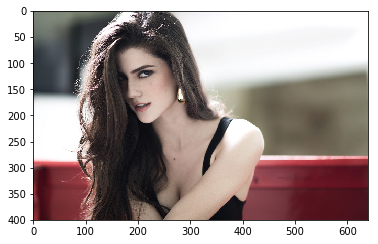

In [4]:
if len(img.shape) > 2: #In case of color image
    plt.imshow(cv2.cvtColor(img, 4)) #Convert from BGR to RGB before showing since cv2 loads images in BGR order.
else:
    plt.imshow(img, cmap='gray') #Have to specify cmap when showing image with matplotlib 
                                 #since the default cmap is viridis
    plt.xticks([]), plt.yticks([])

Alternative way is to manipulate the img matrix directly

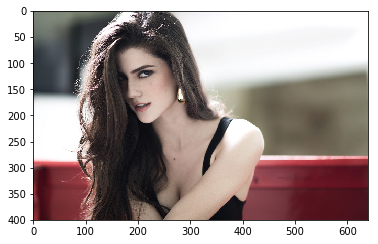

In [5]:
#Reverse the order in the third dimension, 
#which is the color channel, means convert from BGR to RGB
if len(img.shape) > 2:
    plt.imshow(img[:,:,::-1])

## Display a grayscale image in various colormaps

In [6]:
#Helper function to display a grayscale image in various colormaps
def img_show(img, cmap):
    plt.imshow(img, cmap=cmap)
    
#List of some color map
cmap_list = ['viridis', 'magma', 'inferno', 'plasma', 'Blues' ,'Greens', 'Reds', 
             'gray', 'bone' ,'winter' ,'summer' ,'cool' ,'hot' ,'Spectral', 'seismic']
cmap_dict = {i: cmap_list[i] for i in range(len(cmap_list))}

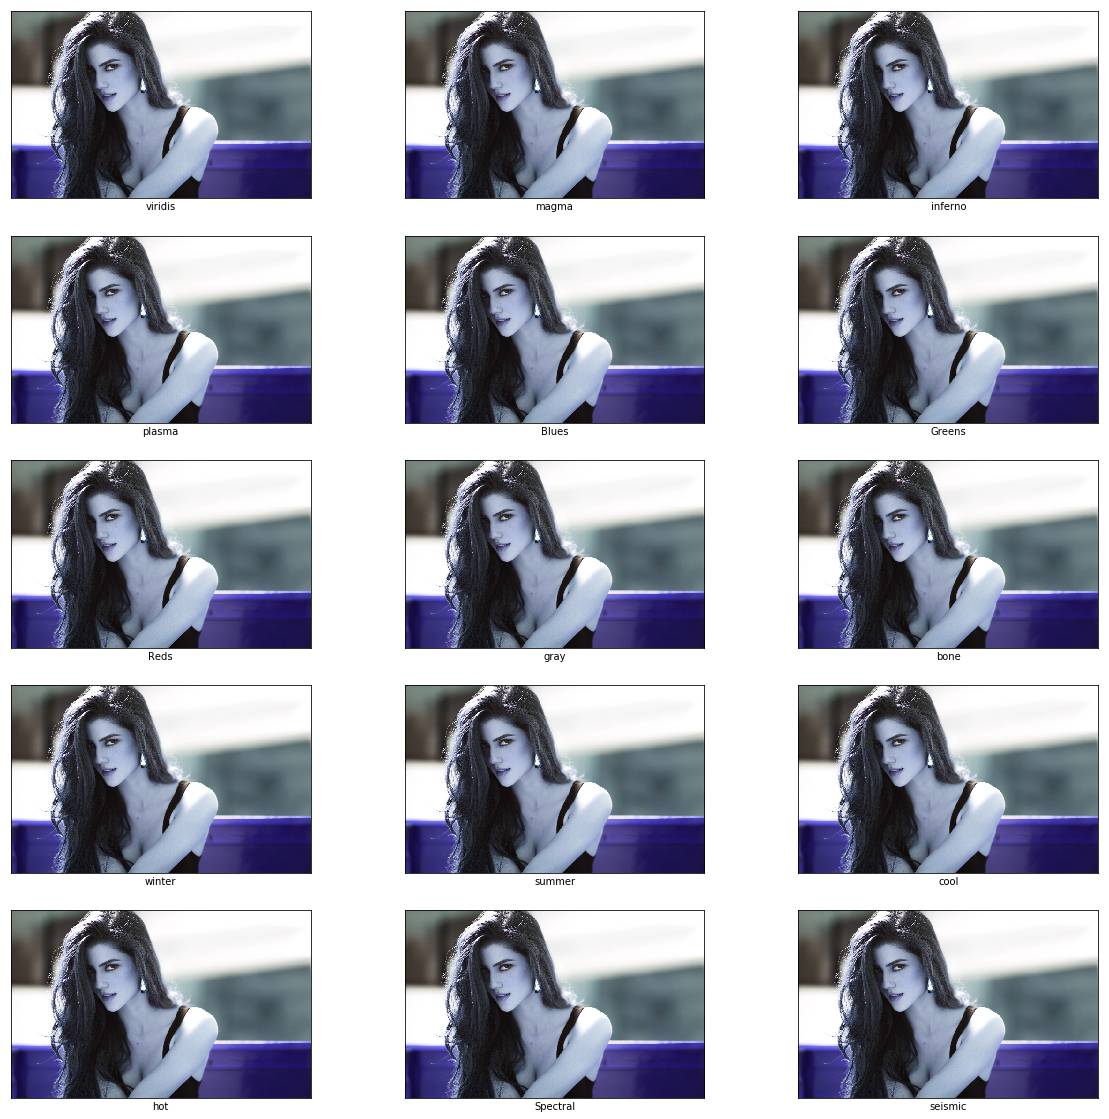

In [7]:
fig = plt.figure(figsize=(20,20))
for i in cmap_dict:
    plt.subplot(5,3,i+1)
    img_show(img, cmap_dict[i])
    plt.xlabel('{}'.format(cmap_dict[i]))
    plt.xticks([]), plt.yticks([])

# Getting Started with Videos

## Load video from webcam, processing frame by frame, and save result

In [8]:
def show_webcam(wc_id=0, in_file=None, width=800, height=600, func_list=None, file=None):
    if in_file==None:
        cap = cv2.VideoCapture(wc_id)
    else:
        cap = cv2.VideoCapture(in_file)
    cap.set(3, width) #Set width resolution of frames
    cap.set(4, height) #Set height resolution of frames
    
    if file != None:
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(file,fourcc, 20.0, (width,height))
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        if ret:
            if func_list != None:
                for func in func_list:
                    frame = func(frame)
                cv2.imshow('video', frame)
            else:
                cv2.imshow('video', frame)
        
            if file != None:
                out.write(frame)
            
            if cv2.waitKey(1 if in_file==None else 42) & 0xFF==27:
                break
        else:
            break
            
    cap.release()
    
    if file != None:
        out.release()
        
    cv2.destroyAllWindows()

## Show video from webcam

In [57]:
show_webcam()

In [10]:
#show_webcam(in_file='output.avi')

## Real-time processing video from webcam

In [11]:
def gaussian_blur(ksize, sigma): #Function to do gaussian blur
    def blur(img):
        img = cv2.GaussianBlur(img, ksize, sigmaX=sigma)
        return img
    return blur

#Alternate way using lambda function
#def gaussian_blur(ksize, sigma): #Function to do gaussian blur
#    return lambda img: cv2.GaussianBlur(img, ksize, sigmaX=sigma)

### Convert to Grayscale, Smoothing and then Edge dectection

In [56]:
to_gray = lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ksize = (3, 3)
sigma = 0.01

smoothing = gaussian_blur(ksize, sigma)
edge_detect = lambda img: cv2.Canny(img, 100, 150)

show_webcam(func_list=[to_gray, smoothing, edge_detect])